In [31]:
import os
import sys
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

In [32]:
from PyKakao import *
from config import KEYS

In [4]:
# 카카오 REST API 키
service_key = KEYS.get("KAKAO")

## Karlo

In [5]:
api = Karlo(service_key)

- 이미지 생성하기

In [35]:

# 프롬프트에 사용할 제시어
text = "Cute magical flyng cat, soft golden fur, fantasy art drawn by Pixar concept artist, Toy Story main character, clear and bright eyes, sharp nose"

# 이미지 생성하기 REST API 호출
img_dict = api.text_to_image(text, 1)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = api.string_to_image(base64_string = img_str, mode = 'RGBA')

- 이미지 변환하기

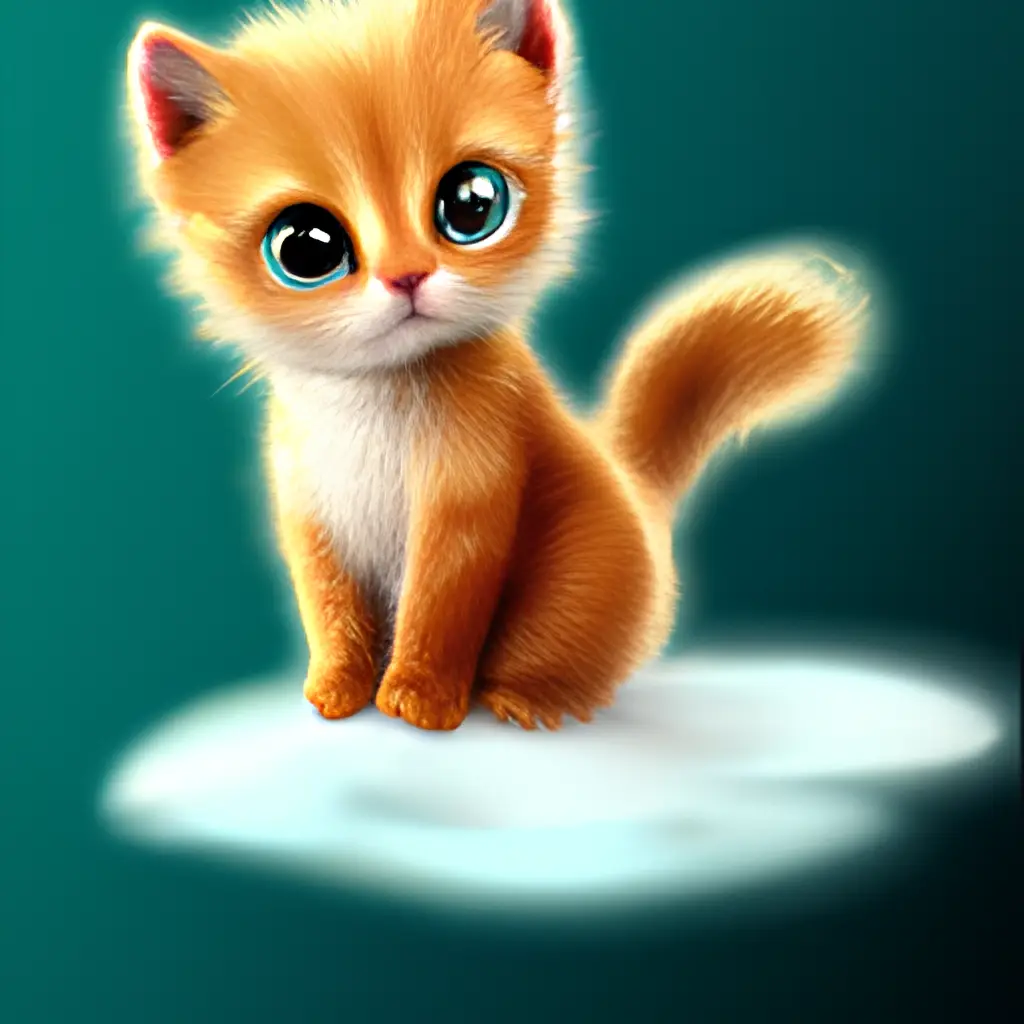

In [33]:
from PIL import Image

# 이미지 파일 불러오기
img = Image.open('../assets/img/example_karlo_cat.png')

# 이미지를 Base64 인코딩하기
img_base64 = api.image_to_string(img)

# 이미지 변환하기 REST API 호출
response = api.transform_image(image = img_base64, batch_size=1)

# 응답의 첫 번째 이미지 생성 결과 출력하기
result = api.string_to_image(response.get("images")[0].get("image"), mode = 'RGB')
result

- 이미지 편집하기

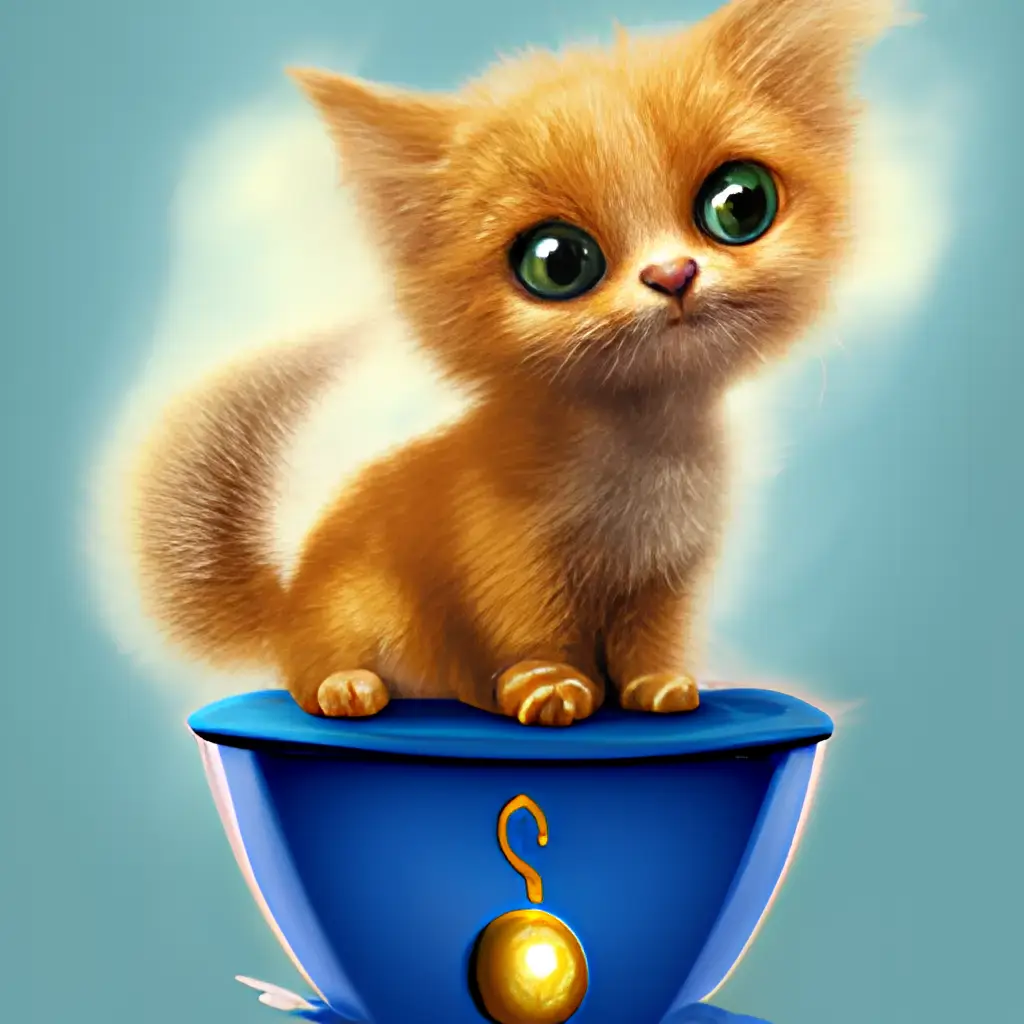

In [66]:
# 이미지 파일 불러오기
img = Image.open('../assets/img/example_karlo_cat.png')
mask = Image.open('../assets/img/example_karlo_mask.png')

# 이미지를 Base64 인코딩하기
img_base64 = api.image_to_string(img)
mask_base64 = api.image_to_string(mask)

# 프롬프트에 사용할 제시어
text = "whatever"

# 이미지 변환하기 REST API 호출
response = api.inpaint_image(image = img_base64, mask = mask_base64, text = text, batch_size = 1)

# 응답의 첫 번째 이미지 생성 결과 출력하기
result = api.string_to_image(response.get("images")[0].get("image"), mode = 'RGB')
result

In [67]:
result.save("../assets/img/example_karlo_inpaint.png")

# Message

In [ ]:
# 카카오 메시지 API 인스턴스 생성
API = Message(service_key)

In [ ]:
# 카카오 인증코드 발급 URL 생성
auth_url = API.get_url_for_generatiing_code()
print(auth_url)

In [ ]:
# 카카오 인증코드 발급 URL 접속 후 리다이렉트된 URL
url = "https://localhost:5000/?code=q4uqoy53MvJ_ZFZOfoOynbd55rLYecKKfEo9rtTiwk_wXp1Dm3LWlf_bdLd_eVB4eunSmgopcJ8AAAGFGsKe4A"
# 위 URL로 액세스 토큰 추출
access_token = API.get_access_token_by_redirected_url(url)

In [ ]:
# 액세스 토큰 설정
API.set_access_token(access_token)

In [ ]:
# 피드 메시지 전송

content = {
            "title": "오늘의 디저트",
            "description": "아메리카노, 빵, 케익",
            "image_url": "https://mud-kage.kakao.com/dn/NTmhS/btqfEUdFAUf/FjKzkZsnoeE4o19klTOVI1/openlink_640x640s.jpg",
            "image_width": 640,
            "image_height": 640,
            "link": {
                "web_url": "http://www.daum.net",
                "mobile_web_url": "http://m.daum.net",
                "android_execution_params": "contentId=100",
                "ios_execution_params": "contentId=100"
            }
        }

item_content = {
            "profile_text" :"Kakao",
            "profile_image_url" :"https://mud-kage.kakao.com/dn/Q2iNx/btqgeRgV54P/VLdBs9cvyn8BJXB3o7N8UK/kakaolink40_original.png",
            "title_image_url" : "https://mud-kage.kakao.com/dn/Q2iNx/btqgeRgV54P/VLdBs9cvyn8BJXB3o7N8UK/kakaolink40_original.png",
            "title_image_text" :"Cheese cake",
            "title_image_category" : "Cake",
            "items" : [
                {
                    "item" :"Cake1",
                    "item_op" : "1000원"
                },
                {
                    "item" :"Cake2",
                    "item_op" : "2000원"
                },
                {
                    "item" :"Cake3",
                    "item_op" : "3000원"
                },
                {
                    "item" :"Cake4",
                    "item_op" : "4000원"
                },
                {
                    "item" :"Cake5",
                    "item_op" : "5000원"
                }
            ],
            "sum" :"Total",
            "sum_op" : "15000원"
        }

social = {
            "like_count": 100,
            "comment_count": 200,
            "shared_count": 300,
            "view_count": 400,
            "subscriber_count": 500
        }

buttons = [
            {
                "title": "웹으로 이동",
                "link": {
                    "web_url": "http://www.daum.net",
                    "mobile_web_url": "http://m.daum.net"
                }
            },
            {
                "title": "앱으로 이동",
                "link": {
                    "android_execution_params": "contentId=100",
                    "ios_execution_params": "contentId=100"
                }
            }
        ]

API.send_feed(content=content, item_content=item_content, social=social, buttons=buttons)

In [ ]:
# 리스트 메시지 전송

header_title = "WEEKELY MAGAZINE"
header_link = {
            "web_url": "http://www.daum.net",
            "mobile_web_url": "http://m.daum.net",
            "android_execution_params": "main",
            "ios_execution_params": "main"
        }
contents = [
            {
                "title": "자전거 라이더를 위한 공간",
                "description": "매거진",
                "image_url": "https://mud-kage.kakao.com/dn/QNvGY/btqfD0SKT9m/k4KUlb1m0dKPHxGV8WbIK1/openlink_640x640s.jpg",
                "image_width": 640,
                "image_height": 640,
                "link": {
                    "web_url": "http://www.daum.net/contents/1",
                    "mobile_web_url": "http://m.daum.net/contents/1",
                    "android_execution_params": "/contents/1",
                    "ios_execution_params": "/contents/1"
                }
            },
            {
                "title": "비쥬얼이 끝내주는 오레오 카푸치노",
                "description": "매거진",
                "image_url": "https://mud-kage.kakao.com/dn/boVWEm/btqfFGlOpJB/mKsq9z6U2Xpms3NztZgiD1/openlink_640x640s.jpg",
                "image_width": 640,
                "image_height": 640,
                "link": {
                    "web_url": "http://www.daum.net/contents/2",
                    "mobile_web_url": "http://m.daum.net/contents/2",
                    "android_execution_params": "/contents/2",
                    "ios_execution_params": "/contents/2"
                }
            },
            {
                "title": "감성이 가득한 분위기",
                "description": "매거진",
                "image_url": "https://mud-kage.kakao.com/dn/NTmhS/btqfEUdFAUf/FjKzkZsnoeE4o19klTOVI1/openlink_640x640s.jpg",
                "image_width": 640,
                "image_height": 640,
                "link": {
                    "web_url": "http://www.daum.net/contents/3",
                    "mobile_web_url": "http://m.daum.net/contents/3",
                    "android_execution_params": "/contents/3",
                    "ios_execution_params": "/contents/3"
                }
            }
        ]
buttons = [
            {
                "title": "웹으로 이동",
                "link": {
                    "web_url": "http://www.daum.net",
                    "mobile_web_url": "http://m.daum.net"
                }
            },
            {
                "title": "앱으로 이동",
                "link": {
                    "android_execution_params": "main",
                    "ios_execution_params": "main"
                }
            }
        ]


API.send_list(header_title=header_title, header_link=header_link, contents=contents, buttons=buttons)

In [ ]:
# 위치 메시지 전송

address = "경기 성남시 분당구 판교역로 235 에이치스퀘어 N동 7층"
address_title = "카카오 판교오피스"
content = {
                "title": "카카오 판교오피스",
                "description": "카카오 판교오피스 위치입니다.",
                "image_url": "https://mud-kage.kakao.com/dn/drTdbB/bWYf06POFPf/owUHIt7K7NoGD0hrzFLeW0/kakaolink40_original.png",
                "image_width": 800,
                "image_height": 800,
                "link": {
                    "web_url": "https://developers.kakao.com",
                    "mobile_web_url": "https://developers.kakao.com/mobile",
                    "android_execution_params": "platform=android",
                    "ios_execution_params": "platform=ios"
                }
            }
buttons = [
                {
                    "title": "웹으로 보기",
                    "link": {
                        "web_url": "https://developers.kakao.com",
                        "mobile_web_url": "https://developers.kakao.com/mobile"
                    }
                }
            ]

API.send_location(address=address, address_title=address_title, content=content, buttons=buttons)

In [ ]:
# 커머스 메시지 전송

content = {
            "title": "Ivory long dress (4 Color)",
            "image_url": "https://mud-kage.kakao.com/dn/RY8ZN/btqgOGzITp3/uCM1x2xu7GNfr7NS9QvEs0/kakaolink40_original.png",
            "image_width": 640,
            "image_height": 640,
            "link": {
                "web_url": "https://style.kakao.com/main/women/contentId=100",
                "mobile_web_url": "https://style.kakao.com/main/women/contentId=100",
                "android_execution_params": "contentId=100",
                "ios_execution_params": "contentId=100"
            }
        }

commerce = {
            "regular_price": 208800,
            "discount_price": 146160,
            "discount_rate": 30
        }

button = [
            {
                "title": "구매하기",
                "link": {
                    "web_url": "https://style.kakao.com/main/women/contentId=100/buy",
                    "mobile_web_url": "https://style.kakao.com/main/women/contentId=100/buy",
                    "android_execution_params": "contentId=100&buy=true",
                    "ios_execution_params": "contentId=100&buy=true"
                }
            },
            {
                "title": "공유하기",
                "link": {
                    "web_url": "https://style.kakao.com/main/women/contentId=100/share",
                    "mobile_web_url": "https://style.kakao.com/main/women/contentId=100/share",
                    "android_execution_params": "contentId=100&share=true",
                    "ios_execution_params": "contentId=100&share=true"
                }
            }
        ]

API.send_commerce(content=content, commerce=commerce, button=button)

In [ ]:
# 텍스트 메시지 전송

text = "텍스트 영역입니다. 최대 200자 표시 가능합니다."
link = {
            "web_url": "https://developers.kakao.com",
            "mobile_web_url": "https://developers.kakao.com"
        }
button_title = "바로 확인"

API.send_text(text=text, link={}, button_title=button_title)

## KoGPT

In [ ]:
# KoGPT API 세션 정의
GPT = KoGPT(service_key)

### 다음 문장 만들기

In [ ]:
# 필수 파라미터
prompt = "인간처럼 생각하고, 행동하는 '지능'을 통해 인류가 이제까지 풀지 못했던"
max_tokens = 64

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.7, top_p=0.8)
result

### 문장 분류하기

In [ ]:
# 필수 파라미터
prompt = """상품 후기를 긍정 또는 부정으로 분류합니다.
가격대비좀 부족한게많은듯=부정
재구매 친구들이 좋은 향 난다고 해요=긍정
ㅠㅠ약간 후회가 됩니다..=부정
이전에 먹고 만족해서 재구매합니다=긍정
튼튼하고 잘 쓸수 있을 것 같습니다. 이 가격에 이 퀄리티면 훌륭하죠="""
max_tokens = 1

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.4)
result

### 뉴스 한 줄 요약하기

In [ ]:
# 필수 파라미터
prompt = """카카오(각자대표 남궁훈, 홍은택)의 임팩트 커머스 카카오메이커스와 카카오브레인(대표 김일두)이 '세계 동물의 날'을 맞아 멸종 위기 동물 보호에 힘을 보탠다. 

카카오메이커스와 카카오브레인은 4일 세계 동물의 날을 맞아, 카카오브레인의 AI 아티스트 '칼로' 와 현대미술가 고상우 작가가 협업한 제품을 오는 12일까지 카카오메이커스에서 단독 판매한다고 밝혔다. 판매 수익금 전액은 WWF(세계자연기금)에 기부할 예정이다. 

이번 프로젝트에 참여한 AI 아티스트 '칼로'는 'minDALL-E', 'RQ-Transformer' 등 카카오브레인의 초거대 이미지 생성 AI 모델을 발전시켜 하나의 페르소나로 재탄생한 AI 아티스트다. 1.8억 장 규모의 텍스트-이미지 데이터셋을 학습해 이해한 문맥을 바탕으로 다양한 화풍과 스타일로 이미지를 생성할 수 있다. 올해 6월에는 고상우 작가와의 공동 작업으로 생성한 1,000개의 호랑이 이미지를 조합한 디지털 작품으로 전시회를 진행한 바 있다. 

이번 프로젝트를 통해 선보이는 제품은 맨투맨과 머그컵이다. '칼로'가 생성한 호랑이 그림과 푸른색 사진 예술의 선구자인 고상우 작가 특유의 드로잉이 조화롭게 어우러져 완성된 500점의 호랑이 그림 모자이크 'Blue Tiger'가 새겨져 있다. 판매 수익금 전액은 WWF(세계자연기금)에 기부됨과 동시에, 낭비 없는 생산을 위해 주문 수량만큼 제품을 생산하는 카카오메이커스의 환경친화적 주문제작 방식(POD 생산)을 도입했다. 

카카오브레인 김일두 대표는 "AI 아티스트 칼로가 생성한 예술 작품으로 멸종 위기 동물 보호 활동에 동참하게 되어 기쁘다"며, "앞으로도 우리의 AI 기술을 통해 사회에 환원할 수 있는 의미 있는 프로젝트에 지속 참여하겠다"며 포부를 전했다. 

카카오 정영주 메이커스 실장은 "지난 8월 고양이의 날을 기념한 제품을 기획/판매해 기부한데 이어 사회의 다양한 구성원을 존중하고 배려하는 프로젝트를 이어가고 있다"며 "더 나은 세상을 만들기 위한 이용자들의 관심을 확인하고 있으며, 앞으로도 임팩트 커머스로서 다양한 가치를 담은 메이커스만의 제품을 선보일 것" 이라고 밝혔다.

한줄 요약:"""
max_tokens = 128

# 결과 조회
result = GPT.generate(prompt, max_tokens, top_p=0.7)
result

### 질문에 답변하기

In [ ]:
# 필수 파라미터
prompt = """의료 스타트업으로 구성된 원격의료산업협의회가 10월부터 열리는 국정감사 시기에 맞춰 국회와 정부에 비대면 진료법 근거 마련을 촉구하는 정책제안서를 제출한다. 코로나19 사태에 비대면 진료의 한시 허용으로 원격 진료, 의약품 배송 등 서비스가 속속 등장하는 가운데 제도화 논의를 서둘러야 한다는 목소리가 높아질 것으로 전망된다. 코리아스타트업포럼 산하 원격의료산업협의회는 '위드(with) 코로나' 방역 체계 전환을 염두에 두고 비대면 진료 제도화 촉구를 위한 공동 대응 작업을 추진하고 있다. 협의회는 닥터나우, 엠디스퀘어, SH바이오, 메디버디 등 의료 스타트업 13개사로 구성됐다. 협의회는 국정감사 시기를 겨냥해 국회와 주무 부처인 보건복지부에 비대면 진료의 법적 근거 마련을 촉구할 방침이다. 이를 위해 주요 의원실과 관련 의견을 교환하고 있다. 협의회는 궁극적으로 의료법과 약사법 개정이 필요하지만 의료법 테두리 안에서 시행령 개정 등으로도 비대면 진료 가능성과 대상·의료기관 등을 구체화할 수 있다는 복안이다. 복지부 장관령으로 비대면 진료 기간을 명시하는 방안 등을 통해 사업 리스크도 줄일 수 있다. 올해 안에 국내 방역체계 패러다임이 바뀔 것으로 예상되는 점도 비대면 진료 제도화의 필요성을 높이고 있다. 최근 코로나19 백신 접종이 속도를 내면서 방역 당국은 위드 코로나 방역체계 전환을 고려하고 있다. 인구 대비 백신 접종 완료율이 70%가 되는 오는 10월 말에는 전환 논의가 수면 위로 뜰 것으로 보인다.
정책제안서를 제출하는 시기는 언제인가?:"""
max_tokens = 128

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.2)
result

### 특정 정보 추려내기

In [ ]:
# 필수 파라미터
prompt = """임진왜란(壬辰倭亂)은 1592년(선조 25년) 도요토미 정권이 조선을 침략하면서 발발하여 1598년(선조 31년)까지 이어진 전쟁이다. 또한 임진왜란은 동아시아에 막대한 영향을 끼쳤으며, 두번의 침입이 있어서 제2차 침략은 정유재란이라 따로 부르기도 한다. 또한 이때 조선은 경복궁과 창덕궁 등 2개의 궁궐이 소실되었으며 약 백만명의 인구가 소실되었다.

명칭
일반적으로 임진년에 일어난 왜의 난리란 뜻으로 지칭되며 그 밖에 조선과 일본 사이에 일어난 전쟁이란 뜻에서 조일전쟁(朝日戰爭), 임진년에 일어난 전쟁이란 뜻에서 임진전쟁(壬辰戰爭), 도자기공들이 일본으로 납치된 후 일본에 도자기 문화가 전파되었다 하여 도자기 전쟁(陶瓷器戰爭)이라고도 한다. 일본에서는 당시 연호를 따서 분로쿠의 역(일본어: 文禄の役 분로쿠노에키[*])이라 하며, 중화인민공화국과 중화민국에서는 당시 명나라 황제였던 만력제의 호를 따 만력조선전쟁(萬曆朝鮮戰爭, 중국어: 萬曆朝鮮之役), 혹은 조선을 도와 왜와 싸웠다 하여 항왜원조(抗倭援朝)라고도 하며, 조선민주주의인민공화국에서는 임진조국전쟁(壬辰祖國戰爭)이라고 한다. 그밖에도 7년간의 전쟁이라 하여 7년 전쟁(七年戰爭)으로도 부른다.

임진왜란 때 조선의 왕은?

답:"""
max_tokens = 1

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.3)
result

### 말투 바꾸기

In [ ]:
# 필수 파라미터
prompt = """주어진 문장을 존댓말 문장으로 바꿔주세요.

문장:하지마!
존댓말:하지 말아주세요.

문장:나랑 같이 놀러가자
존댓말:저랑 같이 놀러가지 않으실래요?

문장:배고파 밥줘
존댓말:배가고픈데 밥을 먹어도 될까요?

문장:그거 재밌어?
존댓말:그것은 재미 있나요?

문장:뭐하는거야 지금
존댓말:지금 무엇을 하시는 건가요?

문장:당장 제자리에 돌려놔
존댓말:"""
max_tokens = 10

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.7)
result

### 채팅하기

In [ ]:
# 필수 파라미터
prompt = """정보:거주지 서울, 나이 30대, 성별 남자, 자녀 두 명, 전공 인공지능, 말투 친절함
정보를 바탕으로 질문에 답하세요.
Q:안녕하세요 반갑습니다. 자기소개 부탁드려도 될까요?
A:안녕하세요. 저는 서울에 거주하고 있는 30대 남성입니다.
Q:오 그렇군요, 결혼은 하셨나요?
A:"""
max_tokens = 32

# 결과 조회
result = GPT.generate(prompt, max_tokens, temperature=0.3, top_p=0.85)
result

## Daum 검색

In [ ]:
# Daum 검색 API 세션 정의
DAUM = DaumSearch(service_key)

### 웹문서 검색

In [ ]:
df = DAUM.search_web("파이썬", dataframe=True)
df.head(1)

### 동영상 검색

In [ ]:
df = DAUM.search_vclip("파이썬", dataframe=True)
df.head(1)

### 이미지 검색

In [ ]:
df = DAUM.search_image("파이썬", dataframe=True)
df.head(1)

### 블로그 검색

In [ ]:
df = DAUM.search_blog("파이썬", dataframe=True)
df.head(1)

### 책 검색

In [ ]:
df = DAUM.search_book("파이썬", dataframe=True)
df.head(1)

### 카페 검색

In [ ]:
df = DAUM.search_cafe("파이썬", dataframe=True)
df.head(1)

## 로컬

In [ ]:
# 로컬 API 세션 정의
LOCAL = Local(service_key)

### 주소 검색하기

In [ ]:
df =  LOCAL.search_address("백현동", dataframe=True)
df.head(1)

### 좌표로 행정구역정보 받기

In [ ]:
df =  LOCAL.geo_coord2regioncode(127.110871319215, 37.3885490672089, dataframe=True)
df.head(1)

### 좌표로 주소 변환하기

In [ ]:
df =  LOCAL.geo_coord2address(127.110871319215, 37.3885490672089, dataframe=True)
df.head(1)

### 좌표계 변환하기

In [ ]:
df =  LOCAL.geo_transcoord(127.110871319215, 37.3885490672089, "WCONGNAMUL", dataframe=True)
df.head(1)

### 키워드로 장소 검색하기

In [ ]:
df =  LOCAL.search_keyword("판교역", dataframe=True)
df.head(1)

### 카테고리로 장소 검색하기

In [ ]:
df =  LOCAL.search_category("MT1", x=127.110871319215, y=37.3885490672089, radius=500, dataframe=True)
df.head(1)